## Búsqueda por optimización y satisfacción de restricciones
### Problema de las 8 reinas

El problema de las 8 reinas consiste en un tablero de ajedrez en donde se colocan 8 piezas correspondientes a las reinas. Como es sabido, estas piezas pueden moverse en todas direcciones (arriba, abajo, a los lados, en diagonal). Al colocar a las reinas, éstas pueden estar o no amenazando a las otras reinas en el tablero.

En algunos casos, se buscará que las reinas estén en tal configuración tal que todas se ataquen entre sí o bien que ninguna se ataque entre sí. Para configurar el problema usamos el siguiente código:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

class Board():
    """Problemas de las k reinas"""
    #__init__(self, size=8): El constructor de la clase.
    #Toma un parámetro opcional size que determina el tamaño del tablero.
    #Inicializa el tablero y queen_board (una matriz numpy que guarda la ubicación de las reinas).

    def __init__(self, size=8):
        #Tamaño del tablero
        self.size = size
        #Piezas en el tablero
        get_row = lambda size, shift: [{"type": (cell_index + shift) % 2, "piece": None}
                                       for cell_index in range(size)]
        self.board = [get_row(self.size, _ % 2) for _ in range(self.size)]
        self.queen_board = np.zeros((size, size))

    def __str__(self):
        return str([[cell["type"] if cell["piece"]==None else cell["piece"] for cell in row] for row in self.board])

    #put(self, piece: str, cell: tuple) -> bool: Coloca una pieza (piece, que se espera que sea una cadena)
    #en una celda específica del tablero (cell, una tupla de fila y columna).
    #Retorna un booleano que indica si la operación tuvo éxito o no.
    def put(self, piece: str, cell: tuple) -> bool:
        """Coloca una pieza en una configuración del tablero"""
        row, column = cell
        self.board[row][column]['piece'] = piece

    #create_array(self): Crea una matriz numpy llamada queen_board que representa la ubicación de las reinas en el tablero.
    def create_array(self):
        """Crea una matriz con la información del tablero"""
        self.queen_board = np.zeros((self.size, self.size))
        for i,row in enumerate(self.board):
            for j in range(self.size):
                if row[j]['piece'] == 'Q':
                    self.queen_board[i][j] = 1


    #put_pieces(self, num=8, init='init', piece='Q'): Coloca un número determinado de piezas (reinas, por defecto) en el tablero.
    #La ubicación de las piezas puede ser aleatoria o predefinida según la opción init.
    def put_pieces(self, num=8, init='init', piece='Q'):
        """Coloca un número num de piezas en el tablero ya sea en configuración
        aleatoria o en alguna otra."""
        if init == 'random':
            elements = range(num)
            for i in elements:
                row, column = np.random.choice(elements), np.random.choice(elements)
                self.put(piece=piece, cell=(row,column))
        elif init == 'init':
            for pos in [(0,6),(1,4),(2,1),(3,3),(4,5),(5,7),(6,2),(7,0)][:num]:
                self.put(piece=piece, cell=pos)
        self.create_array()

    #move(self, i, j): Simula el movimiento de una pieza en el tablero.
    #Si la celda especificada contiene una reina, la mueve a una posición aleatoria del tablero.
    #Esto se hace recursivamente hasta que la reina se coloca en una celda vacía.
    def move(self, i,j):
        """Acción de mover una pieza"""
        s_p = self.board[i][j]
        if s_p['piece'] != 'Q':
            pass
        else:
            m,n = np.random.choice(range(self.size)), np.random.choice(range(self.size))
            s_q = self.board[m][n]
            if s_q['piece'] != 'Q':
                self.board[i][j]['piece'] = None
                self.queen_board[i][j] = 0
                self.board[m][n]['piece'] = 'Q'
                self.queen_board[m][n] = 1
                #self.create_array()
            else:
                self.move(i,j)

    def draw(self):
        """Dibuja el tablero"""
        img_board = np.array([[cell["type"] if cell["piece"]==None else 0.5 for cell in row] for row in self.board])
        plt.imshow(img_board, cmap='Greys')
        plt.axis('off')
        plt.show()

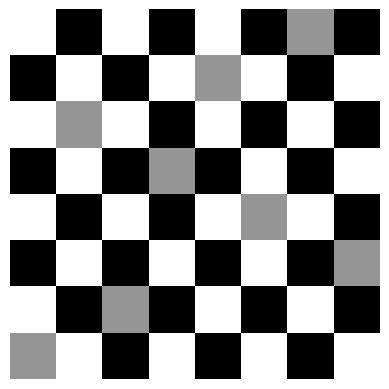

In [ ]:
queens = Board()
queens.put_pieces(num=8)
queens.draw()

##Algoritmos genéticos

Los algoritmos genéticos son algoritmos basados en conceptos biológicos sobre la evolución. Son parte de los algoritmos evolutivos y se basan, precisamente, en la idea de que hay una evolución de los individuos a partir de diferentes procesos biológicos: selección, reproducción, mutación, reemplazo.

* Codificación de soluciones: En un algoritmo genético, las soluciones potenciales al problema que se está resolviendo se representan mediante estructuras llamadas cromosomas o individuos. Estas estructuras son codificadas de alguna manera para que puedan ser manipuladas y evaluadas por el algoritmo.

* Población inicial: Se crea una población inicial de individuos de manera aleatoria o mediante algún método de inicialización. Esta población inicial representa una colección diversa de soluciones potenciales al problema.

* Evaluación de la aptitud: Cada individuo en la población se evalúa utilizando una función de aptitud (fitness) que asigna un valor numérico que indica qué tan buena es la solución representada por ese individuo en términos del problema que se está resolviendo. Esta función de aptitud puede ser diseñada de acuerdo con los requisitos específicos del problema.

* Selección: Selecciona individuos de la población actual para reproducirse y formar la próxima generación de individuos. La probabilidad de selección está influenciada por la aptitud de cada individuo; los individuos más aptos tienen una mayor probabilidad de ser seleccionados.

* Reproducción: Los individuos seleccionados se cruzan entre sí para producir descendencia. Este proceso de cruce implica combinar partes de los cromosomas de los padres para crear nuevos individuos. El cruce puede ser realizado de diferentes maneras, como el cruce de un solo punto, el cruce de múltiples puntos o el cruce uniforme.

* Mutación: Ocasionalmente, se aplican mutaciones a los individuos para introducir variabilidad genética en la población. La mutación implica cambiar aleatoriamente algunos de los genes en los cromosomas de los individuos. Este proceso ayuda a explorar nuevas regiones del espacio de búsqueda y evitar la convergencia prematura hacia una solución subóptima.

* Reemplazo: La nueva generación reemplaza a la generación anterior, y el proceso se repite durante un número predeterminado de generaciones o hasta que se cumple algún criterio de terminación, como alcanzar una solución aceptable o agotar un límite de tiempo o de evaluaciones de aptitud.

Los algoritmos genéticos son eficaces para explorar y buscar soluciones en espacios de búsqueda complejos y multidimensionales, y son especialmente útiles cuando la información sobre la estructura del problema es limitada o no se puede utilizar de manera eficaz mediante otros métodos de optimización.

El problema consistirá en colocar un número **k** de piezas reinas en un tablero de ajedrez. Se colocarán con una configuración inicial en donde la mayoría de las reinas no se atacan y se buscará organizarlas en una configuración que permita que se ataquen la mayoría de las reinas.


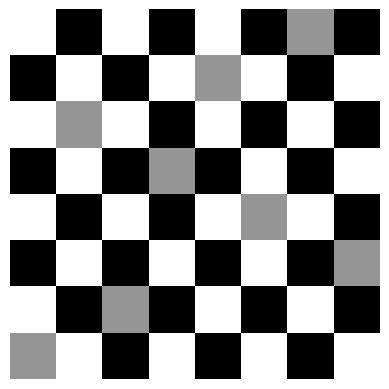

In [ ]:
np.random.seed(12345)
#Crea el problema
board = Board(size=8)
board.put_pieces(num=8)

#Visualiza el problema
board.draw()


##Algoritmo genético simple

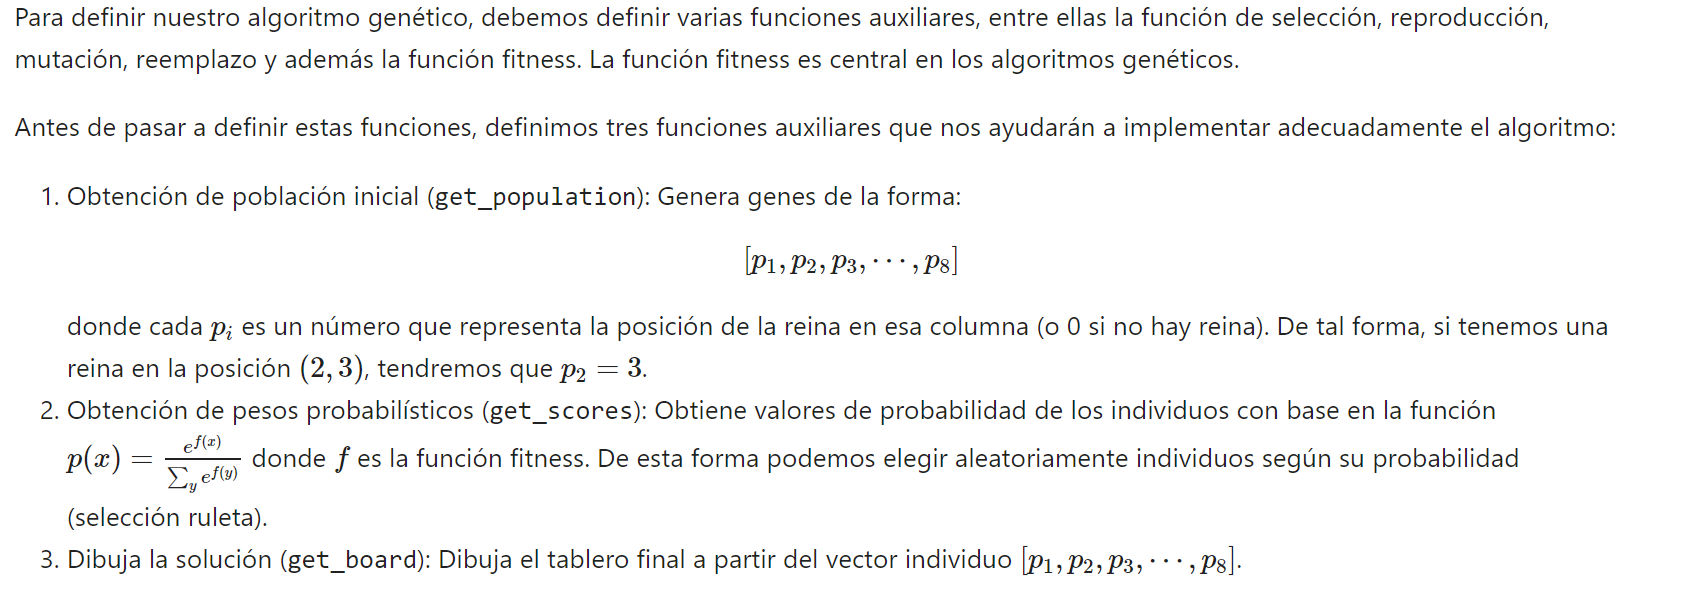

In [ ]:
def get_population(s=7):
    """Genera una población de genes de tamaño s"""
    population = []
    for i in range(s):
        population.append(np.random.choice(8, size=8, replace=False)+1)
    return population

def get_scores(population, fitness_function):
    """Obtiene probabilidades a partir de la función fitness"""
    partition = 0
    probs = np.zeros(len(population))
    for i, subject in enumerate(population):
        score = fitness_function(subject)
        exp = np.exp(score)
        probs[i] = exp
        partition += exp

    return probs/partition

def get_board(array):
    """Dibuja la solución a partir de los genes"""
    new_board = Board(size=8)
    for x,y in enumerate(array):
        new_board.put(piece='Q', cell=(x,y-1))

    return new_board

## Función fitness

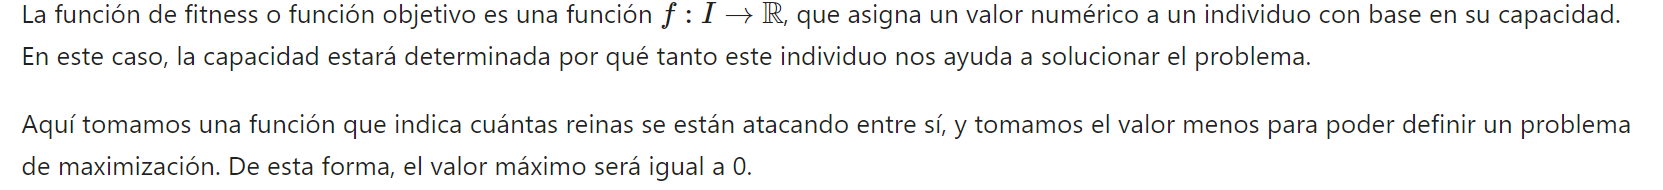

In [ ]:
def fitness(array, s = 8):
    """Función fitness para el problema de 8 reinas"""
    matrix = np.zeros((s,s))
    for i,j in enumerate(array):
        matrix[i,j-1] = 1

    err = 0
    queens = np.stack(np.where(matrix == 1)).T
    for i,j in queens:
        for k in range(1,s+1):
            #Revisa la diagonal
            if i+k<s and j+k<s:
                if [i+k,j+k] in queens.tolist():
                    err += 1
            if i-k>=0 and j-k>=0:
                if [i-k,j-k] in queens.tolist():
                    err += 1
            if i-k>=0 and j+k<s:
                if matrix[i-k, j+k] ==1:
                    err += 1
            if i+k<s and j-k>=0:
                if matrix[i+k, j-k] ==1:
                    err += 1

            #Revisa las columnas
            if i+k<s:
                if matrix[i+k,j]== 1:
                    err += 1
            if i-k >= 0:
                if matrix[i-k,j]== 1:
                    err += 1

            #Revisa los renglones
            if j+k<s:
                if matrix[i,j+k]== 1:
                    err += 1
            if j-k >= 0:
                if matrix[i,j-k]== 1:
                    err += 1
    return -err

## Algoritmo genético

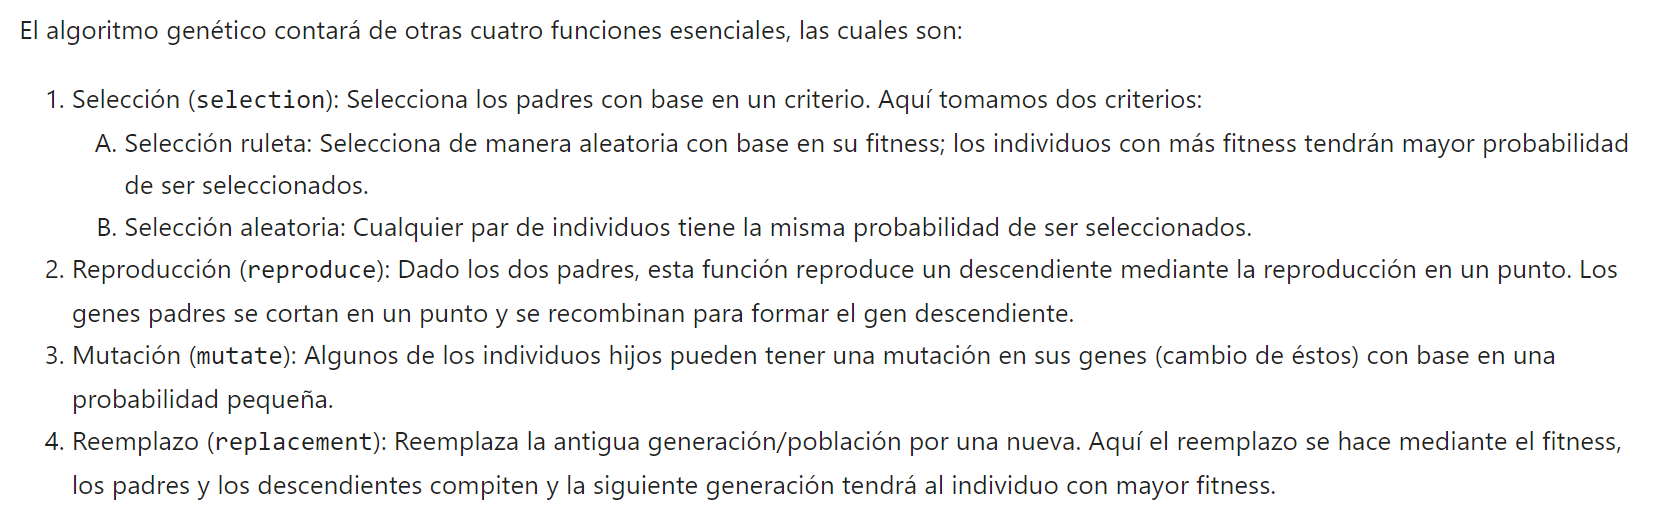

In [ ]:
def selection(population, weights, size=2, method='Roulette'):
    """Función de selección"""
    if method == 'Roulette':
        idx1, idx2 = np.random.choice(range(len(population)), replace=False, size=size, p=weights)
        return population[idx1], population[idx2]
    elif method == 'Random':
        idx1, idx2 = np.random.choice(range(len(population)), replace=False, size=size)
        return population[idx1], population[idx2]

def reproduce(parent1, parent2):
    """Función de reproducción"""
    n = len(parent1)
    c = np.random.choice(range(n))
    return np.hstack((parent1[:c], parent2[c:]))

def mutate(array,p=0.5):
    """Función de mutación"""
    change = np.random.choice([0,1,2], p=[2/4,1/4,1/4])
    if change == 0:
        return array
    elif change == 1:
        v1 = np.random.choice(range(len(array)))
        array[v1] = (array[v1]+1)%8

        return array
    else:
        v1, v2 = np.random.choice(range(len(array)), size=2)
        c1 = array[v1]
        c2 = array[v2]
        array[v1] = c2
        array[v2] = c1

        return array

def replacement(candidates, fitness_function=fitness):
    """Función de reemplazo"""
    sorted_candidates = sorted([(ind, fitness_function(ind)) for ind in candidates], key=lambda x: x[1])

    return sorted_candidates[-1][0]

Finalmente, podemos ya implementar el algoritmo genético propiamente dicho. Este algoritmo cambiará las poblaciones hasta que encuentre un criterio que le permita seleccionar al individuo con mayor fitness en la última descendencia. Aquí el criterio es el número de iteraciones. El algoritmo consta en, dado una población inicial:

* Obtienes los pesos para la selección de los padres.
* Seleccionar a los padres con base en estos pesos.
* Reproducirse para generar un descendiente.
* El descendiente puede presentar alguna mutación.
* Reemplazar la población previa, por la nueva población.

In [ ]:
def genetic_algorithm(population, fitness_function=fitness, t=0):
    """Algoritmo genético"""
    #Obtiene pesos probabilísticos a partir de la función fitness
    weights = get_scores(population,fitness_function=fitness_function)
    #Guarda población descendiente
    population2 = []
    for i in range(len(population)):
        #Selecciona los padres (selección ruleta)
        parent1, parent2 = selection(population, weights, method='Roulette')
        #Reproduce a partir de los padres
        child = reproduce(parent1, parent2)
        #Muta genes en el hijo
        child = mutate(child)
        #Reemplaza por la nueva población con base en el fitness
        new_ind = replacement([child,parent1,parent2], fitness_function=fitness_function)
        population2.append(new_ind)

    if t == 100:
        #Si se cumple el criterio de detención, se visualiza la solución
        idx = np.argmax([fitness_function(subject) for subject in population2])
        get_board(population2[idx]).draw()
        print(fitness_function(population2[idx]))
    else:
        #En otro caso repite los pasos
        genetic_algorithm(population2, fitness_function=fitness_function, t=t+1)

Cuando aplicamos el algoritmo genético al problema de las 8 reinas, debemos codificar el tablero como una secuencia de genes, de la forma que ya lo hemos definido.

De esta forma, cada gen representará la posición de una reina en el tablero y la función fitness es el número de otras reinas a las que esta reina ataca.

Para empezar, generamos una población aleatoria de tamaño s, es decir, s individuos cuyos genes representan configuraciones aleatorias del tablero. De esta forma, al aplicar el algoritmo genético vemos que terminas con una configuración que maximiza la función fitness; es decir, que maximiza el número de reinas que no se atacan entre sí.

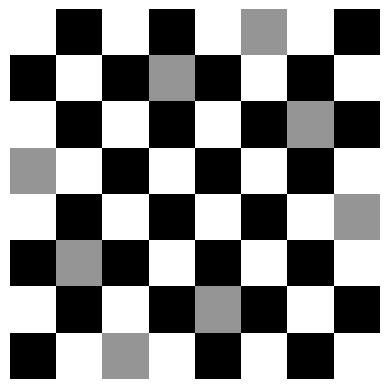

0


In [ ]:

population = get_population(100)
# Ejecuta el algoritmo genético
genetic_algorithm(population)